In [25]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
np.random.seed(2024)

# TP4 : Improve the Metropolis-Hastings algorithm

## Exercise 1: Adaptive Metropolis-Hastings within Gibbs sampler

### 1.A – Metropolis-Hastings within Gibbs sampler

#### Question 1 and question 2

In [72]:
# First initialize the parameters
def initialize_parameters(power = 5):
    # Initialize the parameters
    a = 10
    sigma_x = 3
    sigma_y = 3
    n_sample = 10 ** power
    return a, sigma_x, sigma_y, n_sample

a, sigma_x, sigma_y, n_sample = initialize_parameters()

# -------------------------------------- #

# Define the target distribution and the proposal kernels
def target_distribution(x, y, a):
    """ Target distribution pi(x, y) """
    return np.exp( - (x ** 2 / a ** 2) - y ** 2 - (((x ** 2 / a ** 2) - y ** 2) ** 2) / 4)

def proposal_kernel_x(x, y, sigma_x):
    """ Proposal kernel P1 """
    x_prime = np.random.normal(x, sigma_x)
    y_prime = y
    return x_prime, y_prime

def proposal_kernel_y(x, y, sigma_y):
    """ Proposal kernel P2 """
    x_prime = x
    y_prime = np.random.normal(y, sigma_y)
    return x_prime, y_prime

# -------------------------------------- #
def samples_P(x0, y0, a, sigma_x, sigma_y, n_sample, burnin = 0):
    """ Implement an algorithm which samples a chain with kernel P"""
    samples = list()
    samples.append([x0, y0])
    acceptance_x = 0
    acceptance_y = 0

    for _ in tqdm(range(n_sample)):
        x, y = samples[-1]
        p = np.random.random()
        q = np.random.random()
        if p <= 0.5:    # Update X
            x_prime, y_prime = proposal_kernel_x(x, y, sigma_x)
            alpha = min(1, target_distribution(x_prime, y_prime, a) / target_distribution(x, y, a))
            if q < alpha:    # We accept the sample
                samples.append([x_prime, y_prime])
                acceptance_x += 1
            else:
                samples.append([x, y])
        else:    # Update Y
            x_prime, y_prime = proposal_kernel_y(x, y, sigma_y)
            alpha = min(1, target_distribution(x_prime, y_prime, a) / target_distribution(x, y, a))
            if q < alpha:
                samples.append([x_prime, y_prime])
                acceptance_y += 1
            else:
                samples.append([x, y])
    samples = np.array(samples[burnin:])
    print(f"Acceptance rate for X: {acceptance_x / n_sample}, with sigma_x = {sigma_x}")
    print(f"Acceptance rate for Y: {acceptance_y / n_sample}, with sigma_y = {sigma_y}")
    return np.array(samples), acceptance_x / n_sample, acceptance_y / n_sample

# -------------------------------------- #

100%|██████████| 100000/100000 [00:00<00:00, 415239.39it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Acceptance rate for X: 0.42884, with sigma_x = 3
Acceptance rate for Y: 0.12719, with sigma_y = 3


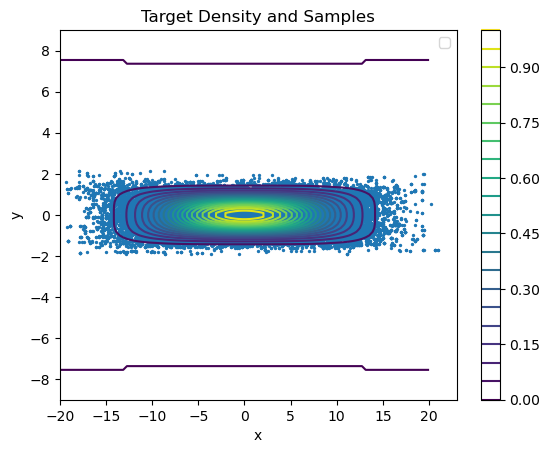

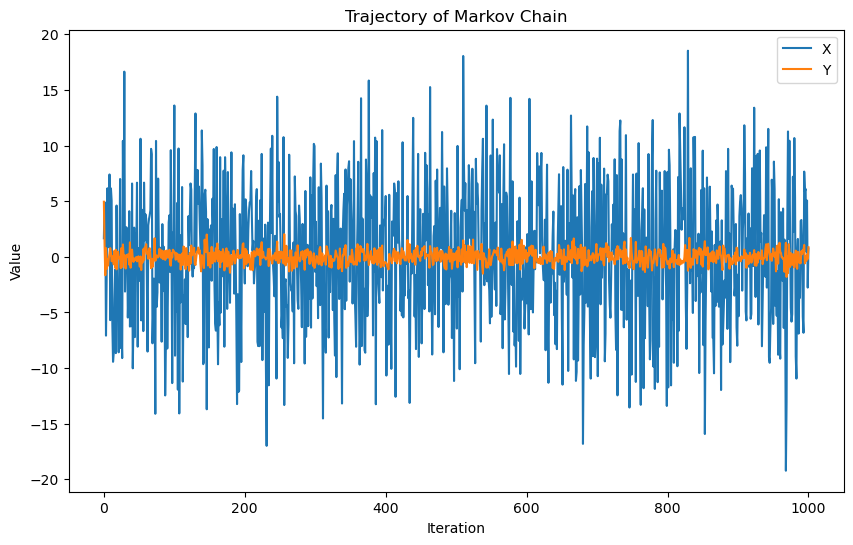

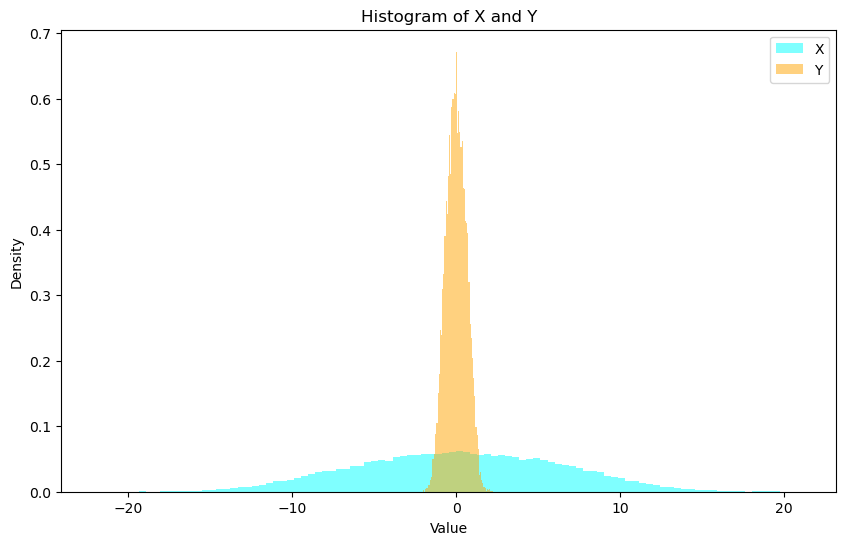

(0.0, 200.0)

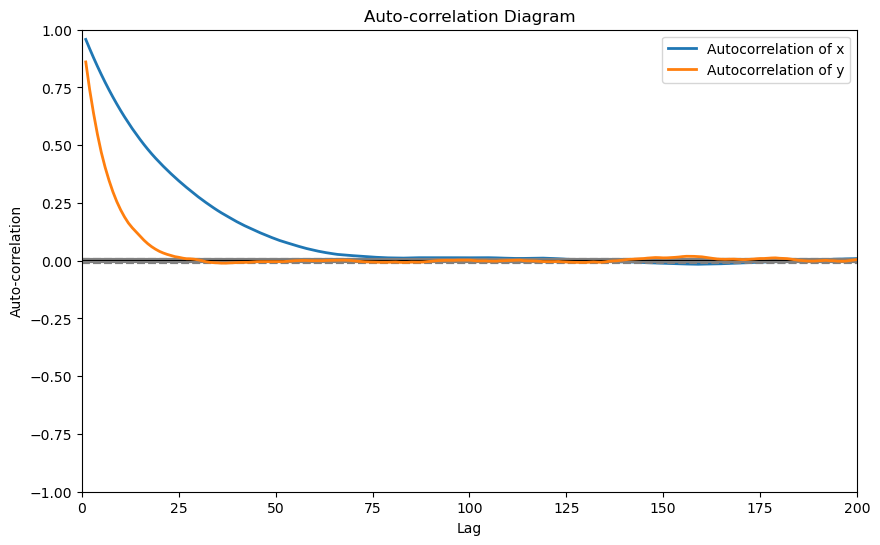

In [73]:
# Generate samples from the target distribution
x0, y0 = np.random.uniform(-a, a), np.random.uniform(-a, a)
samples, _, _ = samples_P(x0, y0, a, sigma_x, sigma_y, n_sample)
X, Y = samples[:, 0], samples[:, 1]

n_burnin = n_sample // 5
X_burnin, Y_burnin = X[n_burnin:], Y[n_burnin:]
plot_offset_x = np.max(X_burnin) // 2
plot_offset_y = np.max(Y_burnin) // 2
x_range = np.linspace(-a - plot_offset_x, a + plot_offset_x, 100)
y_range = np.linspace(-a + plot_offset_y, a - plot_offset_y, 100)
x, y = np.meshgrid(x_range, y_range)
z = target_distribution(x, y, a)

contour = plt.contour(x, y, z, cmap = 'viridis', levels = 20)
plt.scatter(samples[n_burnin:, 0], samples[n_burnin:, 1], s = 2)
plt.title('Target Density and Samples')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)

plt.figure(figsize = (10, 6))
plt.plot(X[::100], label = 'X')
plt.plot(Y[::100], label = 'Y')
plt.title('Trajectory of Markov Chain')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.figure(figsize = (10, 6))
plt.hist(X, bins = 100, density = True, alpha = 0.5, color = "cyan", label = "X")
plt.hist(Y, bins = 100, density = True, alpha = 0.5, color = "orange", label = "Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of X and Y")
plt.legend()
plt.show()

plt.figure(figsize = (10, 6))
pd.plotting.autocorrelation_plot(X, label = 'Autocorrelation of x', linewidth = 2)
pd.plotting.autocorrelation_plot(Y, label = 'Autocorrelation of y', linewidth = 2)
plt.title('Auto-correlation Diagram')
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.legend()
plt.xlim((0,200))

In this situation, the algorithm is not efficient.

The acceptance rate for $x$ stays too high, it might be due to the fact that $ \sigma _1 $ is too small.

#### Question 3

First, we could try different values of $ \sigma $ in order to have good acceptance rates.
Second, incorporing burn-in will improve the performance of our MCMC algorithm by ensuring that the chain has reached its stationary distribution before collecting samples for inference. 

100%|██████████| 100000/100000 [00:00<00:00, 338376.12it/s]


Acceptance rate for X: 0.49588, with sigma_x = 0.1
Acceptance rate for Y: 0.47792, with sigma_y = 0.1


100%|██████████| 100000/100000 [00:00<00:00, 443414.23it/s]


Acceptance rate for X: 0.46567, with sigma_x = 1.5
Acceptance rate for Y: 0.22771, with sigma_y = 1.5


100%|██████████| 100000/100000 [00:00<00:00, 363854.85it/s]


Acceptance rate for X: 0.4507, with sigma_x = 2
Acceptance rate for Y: 0.18354, with sigma_y = 2


100%|██████████| 100000/100000 [00:00<00:00, 345273.86it/s]


Acceptance rate for X: 0.44185, with sigma_x = 2.5
Acceptance rate for Y: 0.15363, with sigma_y = 2.5


100%|██████████| 100000/100000 [00:00<00:00, 462309.62it/s]


Acceptance rate for X: 0.42845, with sigma_x = 3
Acceptance rate for Y: 0.1285, with sigma_y = 3


100%|██████████| 100000/100000 [00:00<00:00, 357510.63it/s]


Acceptance rate for X: 0.38562, with sigma_x = 5
Acceptance rate for Y: 0.07938, with sigma_y = 5


100%|██████████| 100000/100000 [00:00<00:00, 362031.72it/s]


Acceptance rate for X: 0.29381, with sigma_x = 10
Acceptance rate for Y: 0.04073, with sigma_y = 10


100%|██████████| 100000/100000 [00:00<00:00, 362214.30it/s]


Acceptance rate for X: 0.22708, with sigma_x = 15
Acceptance rate for Y: 0.02762, with sigma_y = 15


100%|██████████| 100000/100000 [00:00<00:00, 471298.18it/s]


Acceptance rate for X: 0.18468, with sigma_x = 20
Acceptance rate for Y: 0.0205, with sigma_y = 20


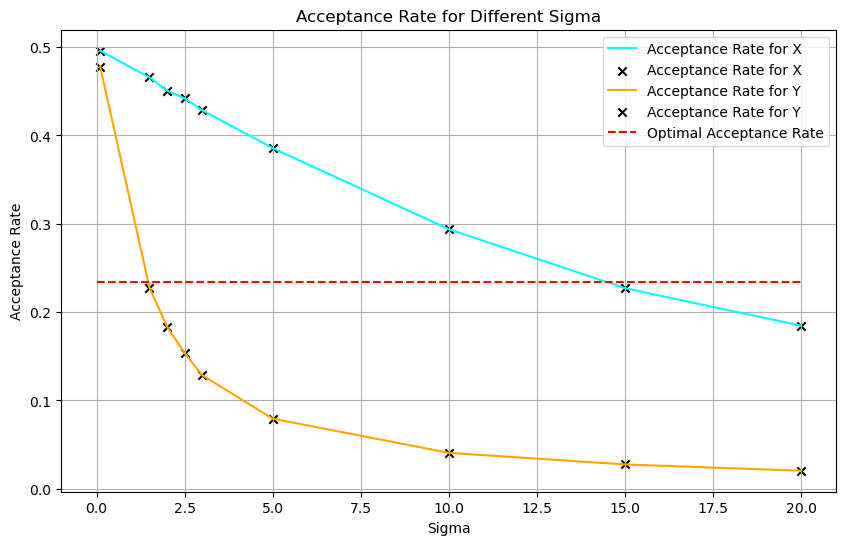

In [46]:
SIGMAS = [0.1, 1.5, 2, 2.5, 3, 5, 10, 15, 20]
acceptance_rates = list()
for sigma in SIGMAS:
    _, acceptance_x, acceptance_y = samples_P(x0, y0, a, sigma, sigma, n_sample)
    acceptance_rates.append([acceptance_x, acceptance_y])

acceptance_rates = np.array(acceptance_rates)
plt.figure(figsize = (10, 6))
plt.plot(SIGMAS, acceptance_rates[:, 0], label = 'Acceptance Rate for X', color = 'cyan')
plt.scatter(SIGMAS, acceptance_rates[:, 0], label = 'Acceptance Rate for X', color = 'black', marker = 'x')
plt.plot(SIGMAS, acceptance_rates[:, 1], label = 'Acceptance Rate for Y', color = "orange")
plt.scatter(SIGMAS, acceptance_rates[:, 1], label = 'Acceptance Rate for Y', color = 'black', marker = 'x')
plt.hlines(0.234, 0, 20, color = 'red', linestyle='--' ,label = 'Optimal Acceptance Rate')
plt.xlabel('Sigma')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate for Different Sigma')
plt.legend()
plt.grid()
plt.show()

From this, we deduce that optimal values for $\sigma _x $ (resp. $\sigma _y $) are  $\sigma _x = 14 $ (resp. $\sigma _y = 1.4$).

100%|██████████| 100000/100000 [00:00<00:00, 327970.05it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Acceptance rate for X: 0.23915, with sigma_x = 14
Acceptance rate for Y: 0.23946, with sigma_y = 1.4


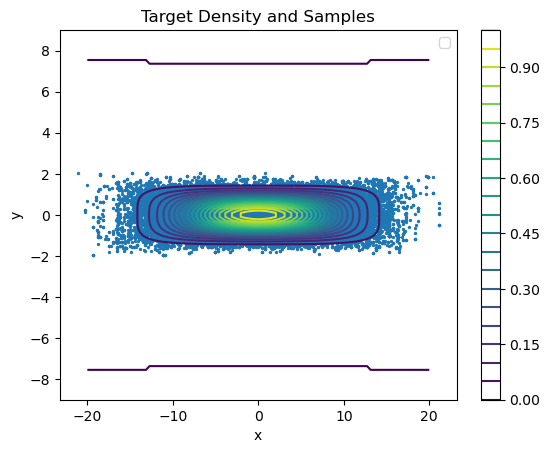

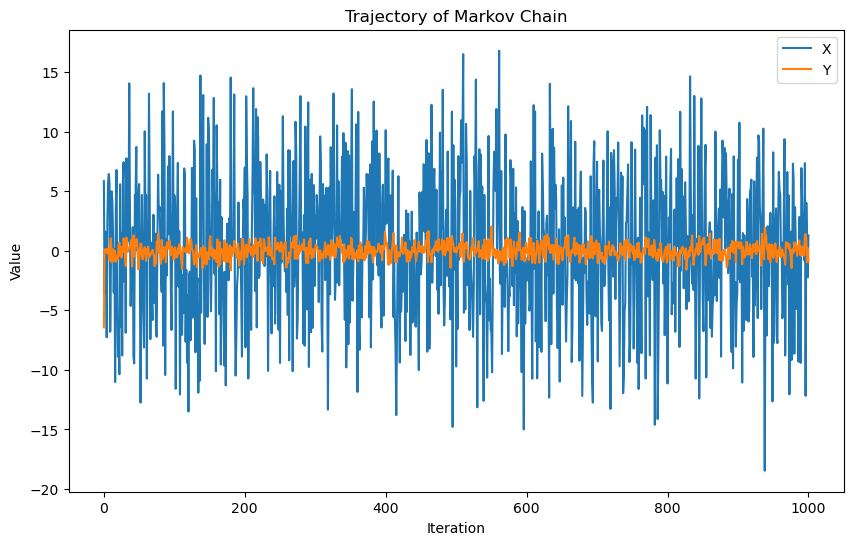

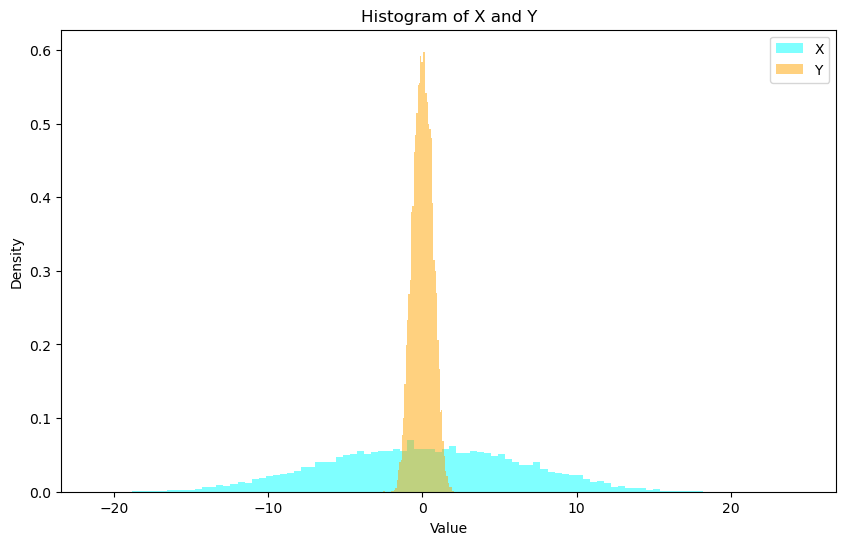

(0.0, 200.0)

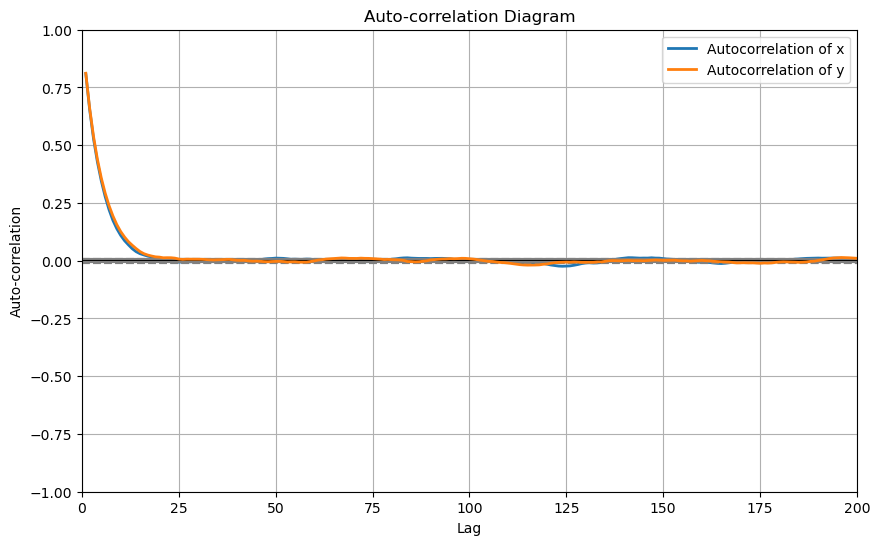

In [59]:
sigma_x = 14
sigma_y = 1.4
samples, _, _ = samples_P(x0, y0, a, sigma_x, sigma_y, n_sample)
X, Y = samples[:, 0], samples[:, 1]

n_burnin = n_sample // 5
X_burnin, Y_burnin = X[n_burnin:], Y[n_burnin:]
plot_offset_x = np.max(X_burnin) // 2
plot_offset_y = np.max(Y_burnin) // 2
x_range = np.linspace(-a - plot_offset_x, a + plot_offset_x, 100)
y_range = np.linspace(-a + plot_offset_y, a - plot_offset_y, 100)
x, y = np.meshgrid(x_range, y_range)
z = target_distribution(x, y, a)

contour = plt.contour(x, y, z, cmap = 'viridis', levels = 20)
plt.scatter(samples[n_burnin:, 0], samples[n_burnin:, 1], s = 2)
plt.title('Target Density and Samples')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)

plt.figure(figsize = (10, 6))
plt.plot(X[::100], label = 'X')
plt.plot(Y[::100], label = 'Y')
plt.title('Trajectory of Markov Chain')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.figure(figsize = (10, 6))
plt.hist(X, bins = 100, density = True, alpha = 0.5, color = "cyan", label = "X")
plt.hist(Y, bins = 100, density = True, alpha = 0.5, color = "orange", label = "Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of X and Y")
plt.legend()
plt.show()

plt.figure(figsize = (10, 6))
pd.plotting.autocorrelation_plot(X, label = 'Autocorrelation of x', linewidth = 2)
pd.plotting.autocorrelation_plot(Y, label = 'Autocorrelation of y', linewidth = 2)
plt.title('Auto-correlation Diagram')
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.legend()
plt.grid()
plt.xlim((0,200))

### 1.B – Adaptive Metropolis-Hastings within Gibbs sampler

#### Algorithm 1: Metropolis-Hastings (symmetric random walk) within Gibbs Sampler

##### **Initialize the state**
$x_k = \left[x_k[1], ..., x_k[d] \right]$

##### **Proposal step**
$ x^* \sim \mathcal{N} (x_k, \sigma ^2) $ 

##### **Gibbs Sampling**
for i in range(1, d+1):

    # Sample using Metropolis-Hastings

$ x_{k+1}[i] \sim \pi (x_i | x_{k+1} [1], ..., x_{k+1} [i-1], x_k[i+1], ..., x_k[d])$

**END**

In [78]:
def MH_within_GS(x0, y0, a, sigma_x0, sigma_y0, n_sample, burnin = 0):
    samples = list()
    samples.append([x0, y0])
    acceptance_x = []
    acceptance_y = []
    sigma_x = sigma_x0
    sigma_y = sigma_y0

    for step in tqdm(range(1, n_sample)):
        x, y = samples[-1]
        p = np.random.random()
        q = np.random.random()

        x_proposed, y_proposed = proposal_kernel_x(x, y, sigma_x)
        alpha = min(1, target_distribution(x_proposed, y_proposed, a) / target_distribution(x, y, a))
        if p < alpha:
            samples.append([x_proposed, y_proposed])
            acceptance_x.append(1)
        else:
            samples.append([x, y])
            acceptance_x.append(0)
        
        x_proposed, y_proposed = proposal_kernel_y(x, y, sigma_y)
        alpha = min(1, target_distribution(x_proposed, y_proposed, a) / target_distribution(x, y, a))
        if q < alpha:
            samples.append([x_proposed, y_proposed])
            acceptance_y.append(1)
        else:
            samples.append([x, y])
            acceptance_y.append(0)
        
        j = step // 50
        if j > 0 and step % 50 == 0:
            delta=min(
                    0.01, 
                    1 / np.sqrt(j)
                    )
            current_acceptance_x = sum(acceptance_x[-50:]) / (50)
            current_acceptance_y = sum(acceptance_y[-50:]) / (50)
            if current_acceptance_x > 0.234:
                sigma_x = np.exp(
                                np.log(
                                    sigma_x
                                    ) + delta)
            else:
                sigma_x = np.exp(
                                np.log(
                                    sigma_x
                                    ) - delta)
            if current_acceptance_y > 0.234:
                sigma_y = np.exp(
                                np.log(
                                    sigma_y
                                    ) + delta)
            else:
                sigma_y = np.exp(
                                np.log(
                                    sigma_y
                                    ) - delta)
    samples = np.array(samples[burnin:])
    print(f"Acceptance rate for X: {np.mean(acceptance_x)}")
    print(f"Acceptance rate for Y: {np.mean(acceptance_y)}")
    print(f"Final sigma_x: {sigma_x}")
    print(f"Final sigma_y: {sigma_y}")
    return np.array(samples), sigma_x, sigma_y

In [81]:
a, sigma_x, sigma_y, n_sample = initialize_parameters()
x0, y0 = 0, 0
samples, sigma_x, sigma_y = MH_within_GS(x0, y0, a, sigma_x, sigma_y, n_sample)

100%|██████████| 99999/99999 [00:00<00:00, 185703.25it/s]

Acceptance rate for X: 0.2729627296272963
Acceptance rate for Y: 0.23254232542325423
Final sigma_x: 30.223273965039883
Final sigma_y: 3.091363601860551


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


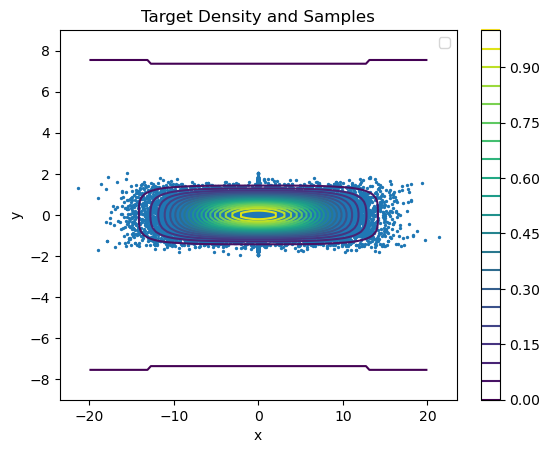

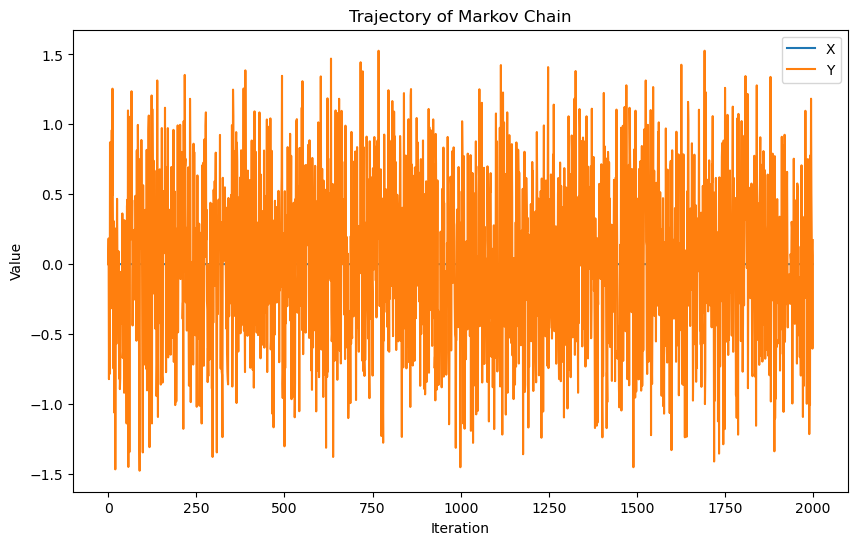

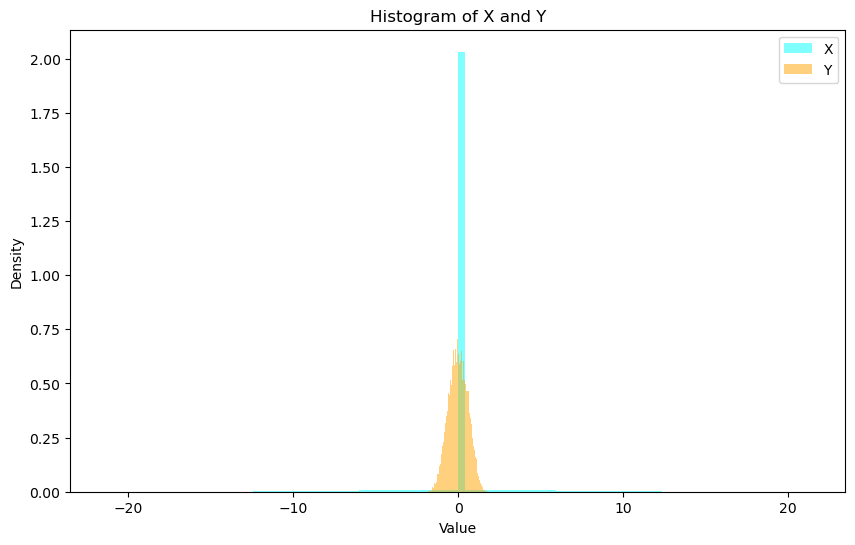

In [82]:
X, Y = samples[:, 0], samples[:, 1]

n_burnin = n_sample // 5
X_burnin, Y_burnin = X[n_burnin:], Y[n_burnin:]
plot_offset_x = np.max(X_burnin) // 2
plot_offset_y = np.max(Y_burnin) // 2
x_range = np.linspace(-a - plot_offset_x, a + plot_offset_x, 100)
y_range = np.linspace(-a + plot_offset_y, a - plot_offset_y, 100)
x, y = np.meshgrid(x_range, y_range)
z = target_distribution(x, y, a)

contour = plt.contour(x, y, z, cmap = 'viridis', levels = 20)
plt.scatter(samples[n_burnin:, 0], samples[n_burnin:, 1], s = 2)
plt.title('Target Density and Samples')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)

plt.figure(figsize = (10, 6))
plt.plot(X[::100], label = 'X')
plt.plot(Y[::100], label = 'Y')
plt.title('Trajectory of Markov Chain')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

plt.figure(figsize = (10, 6))
plt.hist(X, bins = 100, density = True, alpha = 0.5, color = "cyan", label = "X")
plt.hist(Y, bins = 100, density = True, alpha = 0.5, color = "orange", label = "Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of X and Y")
plt.legend()
plt.show()

plt.figure(figsize = (10, 6))
pd.plotting.autocorrelation_plot(X, label = 'Autocorrelation of x', linewidth = 2)
pd.plotting.autocorrelation_plot(Y, label = 'Autocorrelation of y', linewidth = 2)
plt.title('Auto-correlation Diagram')
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.legend()
plt.grid()
plt.xlim((0,200))